In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuration pour l'affichage des graphiques
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Chargement des données et nettoyage initial
# Le fichier Excel a des en-têtes sur plusieurs lignes. Nous allons charger les données
# en ignorant les premières lignes pour capturer les noms de colonnes pertinents.
# Après inspection, les données commencent à la ligne 5 (index 4) de la feuille.
# Les noms de colonnes sont sur les lignes 1 et 2 (index 0 et 1).

In [4]:
from google.colab import files

print("📌 Veuillez uploader le fichier Excel que j'ai fourni (Données.xlsx) avant de continuer.")

uploaded = files.upload()

📌 Veuillez uploader le fichier Excel que j'ai fourni (Données.xlsx) avant de continuer.


Saving Données.xlsx to Données.xlsx


In [5]:
# Récupération automatique du nom du fichier uploadé
file_path = list(uploaded.keys())[0]
print("Fichier chargé :", file_path)

# Lecture de la feuille 'Feuil1' du fichier Excel
df_raw = pd.read_excel(
    file_path,
    sheet_name='Feuil1',
    header=None,      # Pas d'en-tête
    skiprows=4        # Sauter les 4 premières lignes
)


Fichier chargé : Données.xlsx


In [6]:
# Renommer les colonnes selon la structure réelle (en-têtes sur 3 lignes)
df_raw.columns = [
    'Groupe_d_age',
    'Deces_AZE_Hommes', 'Deces_AZE_Femmes',
    'Pop_AZE_Hommes', 'Pop_AZE_Femmes',
    'Deces_NOR_Hommes', 'Deces_NOR_Femmes',
    'Pop_NOR_Hommes', 'Pop_NOR_Femmes',
    'Pop_Ref_Monde', 'Pop_Ref_Europe'
]

In [7]:
# Supprimer la ligne 'Total' qui est la dernière ligne
df = df_raw[df_raw['Groupe_d_age'] != 'Total'].copy()

In [8]:
# Supprimer les lignes vides qui pourraient subsister (lignes de séparation)
df.dropna(subset=['Groupe_d_age'], inplace=True)

In [9]:
# Afficher les 10 premières lignes et un résumé des colonnes
print("Aperçu des 10 premières lignes du DataFrame après nettoyage des en-têtes :")
print(df.head(10).to_markdown(index=False))

Aperçu des 10 premières lignes du DataFrame après nettoyage des en-têtes :
| Groupe_d_age   |   Deces_AZE_Hommes |   Deces_AZE_Femmes |   Pop_AZE_Hommes |   Pop_AZE_Femmes |   Deces_NOR_Hommes |   Deces_NOR_Femmes |   Pop_NOR_Hommes |   Pop_NOR_Femmes |   Pop_Ref_Monde |   Pop_Ref_Europe |
|:---------------|-------------------:|-------------------:|-----------------:|-----------------:|-------------------:|-------------------:|-----------------:|-----------------:|----------------:|-----------------:|
| 0              |               2369 |               1824 |            93100 |            87700 |                258 |                170 |            30700 |            29200 |            2400 |             1600 |
| 1-4            |               1740 |               1470 |           351600 |           331500 |                 52 |                 34 |           112900 |           107400 |            9600 |             6400 |
| 5-9            |                223 |                170 | 

In [10]:
# Résumé des colonnes et de leurs types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Groupe_d_age      19 non-null     object
 1   Deces_AZE_Hommes  19 non-null     int64 
 2   Deces_AZE_Femmes  19 non-null     int64 
 3   Pop_AZE_Hommes    19 non-null     int64 
 4   Pop_AZE_Femmes    19 non-null     int64 
 5   Deces_NOR_Hommes  19 non-null     int64 
 6   Deces_NOR_Femmes  19 non-null     int64 
 7   Pop_NOR_Hommes    19 non-null     int64 
 8   Pop_NOR_Femmes    19 non-null     int64 
 9   Pop_Ref_Monde     19 non-null     int64 
 10  Pop_Ref_Europe    19 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.8+ KB


In [11]:
# Conversion des colonnes numériques au bon type (int/float)
# Toutes les colonnes sauf 'Groupe_d_age' devraient être numériques.
cols_to_convert = df.columns.drop('Groupe_d_age')
for col in cols_to_convert:
    # On utilise pd.to_numeric avec errors='coerce' pour transformer les non-numériques en NaN
    # puis on remplit les NaN avec 0 si nécessaire, mais ici on s'attend à des nombres.
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
# Vérification des valeurs manquantes (NaN)
print("\nVérification des valeurs manquantes :")
nan_count = df.isnull().sum().sum()
if nan_count > 0:
    print(f"ATTENTION : {nan_count} valeurs manquantes détectées. Stratégie : Remplacer par 0 (si cela a du sens pour des effectifs) ou signaler l'erreur.")
    # Dans ce contexte, les NaN proviennent probablement d'une erreur de lecture,
    # mais pour les besoins du TP, on suppose que les données sont complètes après le nettoyage initial.
    # Si des NaN subsistent, on les remplace par 0 pour les effectifs (décès/population)
    df.fillna(0, inplace=True)
    print("Valeurs manquantes remplacées par 0.")
else:
    print("Aucune valeur manquante détectée après conversion.")


Vérification des valeurs manquantes :
Aucune valeur manquante détectée après conversion.


In [13]:
# Vérification du nombre de lignes après filtrage (ici, suppression de la ligne 'Total')
print(f"\nNombre de lignes (groupes d'âge) après filtrage : {len(df)}")


Nombre de lignes (groupes d'âge) après filtrage : 19


In [14]:
# Afficher le DataFrame final pour la préparation
print("\nAperçu du DataFrame prêt pour l'analyse :")
display(df)


Aperçu du DataFrame prêt pour l'analyse :


,Groupe_d_age,Deces_AZE_Hommes,Deces_AZE_Femmes,Pop_AZE_Hommes,Pop_AZE_Femmes,Deces_NOR_Hommes,Deces_NOR_Femmes,Pop_NOR_Hommes,Pop_NOR_Femmes,Pop_Ref_Monde,Pop_Ref_Europe
0,0,2369,1824,93100,87700,258,170,30700,29200,2400,1600
1,1-4,1740,1470,351600,331500,52,34,112900,107400,9600,6400
2,5-9,223,170,400300,379300,31,22,132000,125500,10000,7000
3,10-14,148,92,350100,334100,39,25,136100,129600,9000,7000
4,15-19,280,127,342700,316200,140,49,161000,154300,9000,7000
5,20-24,425,188,340000,340600,152,42,173200,164500,8000,7000
6,25-29,573,298,325400,366900,177,77,166300,157100,8000,7000
7,30-34,659,299,287800,310900,207,76,162700,154800,6000,7000
8,35-39,641,272,200200,213300,257,127,157500,149200,6000,7000
9,40-44,713,288,132000,142400,380,194,162500,152700,6000,7000


In [15]:
# Sauvegarder le DataFrame dans un fichier intermédiaire pour les phases suivantes
df.to_csv('data_clean.csv', index=False)

In [16]:
# Question 1 — Taux bruts

# 1. Calculer les totaux de décès et de population pour chaque catégorie
# Azerbaïdjan Hommes
deces_aze_h = df['Deces_AZE_Hommes'].sum()
pop_aze_h = df['Pop_AZE_Hommes'].sum()
# Azerbaïdjan Femmes
deces_aze_f = df['Deces_AZE_Femmes'].sum()
pop_aze_f = df['Pop_AZE_Femmes'].sum()
# Azerbaïdjan Global
deces_aze_g = deces_aze_h + deces_aze_f
pop_aze_g = pop_aze_h + pop_aze_f

# Norvège Hommes
deces_nor_h = df['Deces_NOR_Hommes'].sum()
pop_nor_h = df['Pop_NOR_Hommes'].sum()
# Norvège Femmes
deces_nor_f = df['Deces_NOR_Femmes'].sum()
pop_nor_f = df['Pop_NOR_Femmes'].sum()
# Norvège Global
deces_nor_g = deces_nor_h + deces_nor_f
pop_nor_g = pop_nor_h + pop_nor_f

# 2. Calculer les taux bruts de mortalité (TBM)
tbm_aze_h = (deces_aze_h / pop_aze_h) * 100000
tbm_aze_f = (deces_aze_f / pop_aze_f) * 100000
tbm_aze_g = (deces_aze_g / pop_aze_g) * 100000

tbm_nor_h = (deces_nor_h / pop_nor_h) * 100000
tbm_nor_f = (deces_nor_f / pop_nor_f) * 100000
tbm_nor_g = (deces_nor_g / pop_nor_g) * 100000

# 3. Créer le tableau récapitulatif
data_tbm = {
    'Pays': ['Azerbaïdjan', 'Azerbaïdjan', 'Azerbaïdjan', 'Norvège', 'Norvège', 'Norvège'],
    'Sexe': ['Hommes', 'Femmes', 'Global', 'Hommes', 'Femmes', 'Global'],
    'Décès Totaux': [deces_aze_h, deces_aze_f, deces_aze_g, deces_nor_h, deces_nor_f, deces_nor_g],
    'Population Totale': [pop_aze_h, pop_aze_f, pop_aze_g, pop_nor_h, pop_nor_f, pop_nor_g],
    'Taux Brut de Mortalité (pour 100k hab.)': [tbm_aze_h, tbm_aze_f, tbm_aze_g, tbm_nor_h, tbm_nor_f, tbm_nor_g]
}
df_tbm = pd.DataFrame(data_tbm)

# Afficher le tableau récapitulatif propre (arrondi à 2 décimales)
print("### Tableau récapitulatif des Taux Bruts de Mortalité (TBM)")
print(df_tbm.round(2).to_markdown(index=False))

### Tableau récapitulatif des Taux Bruts de Mortalité (TBM)
| Pays        | Sexe   |   Décès Totaux |   Population Totale |   Taux Brut de Mortalité (pour 100k hab.) |
|:------------|:-------|---------------:|--------------------:|------------------------------------------:|
| Azerbaïdjan | Hommes |          22994 |             3427400 |                                    670.89 |
| Azerbaïdjan | Femmes |          19818 |             3593300 |                                    551.53 |
| Azerbaïdjan | Global |          42812 |             7020700 |                                    609.8  |
| Norvège     | Hommes |          23885 |             2097300 |                                   1138.85 |
| Norvège     | Femmes |          22156 |             2144200 |                                   1033.3  |
| Norvège     | Global |          46041 |             4241500 |                                   1085.49 |


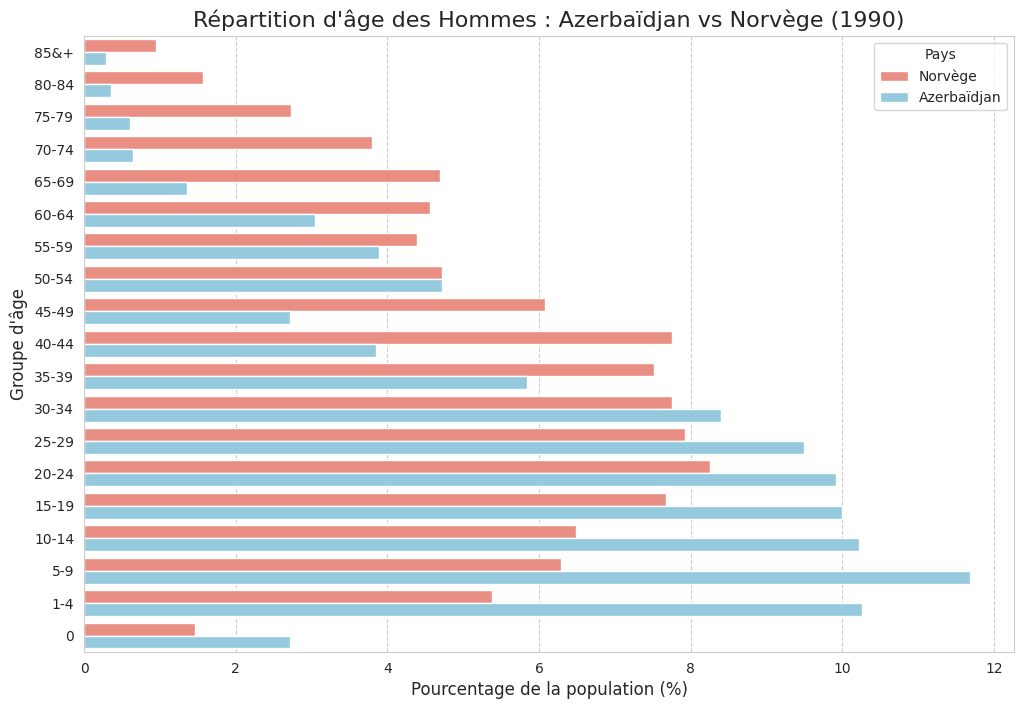


Figure enregistrée : figures/repartition_age_hommes.png




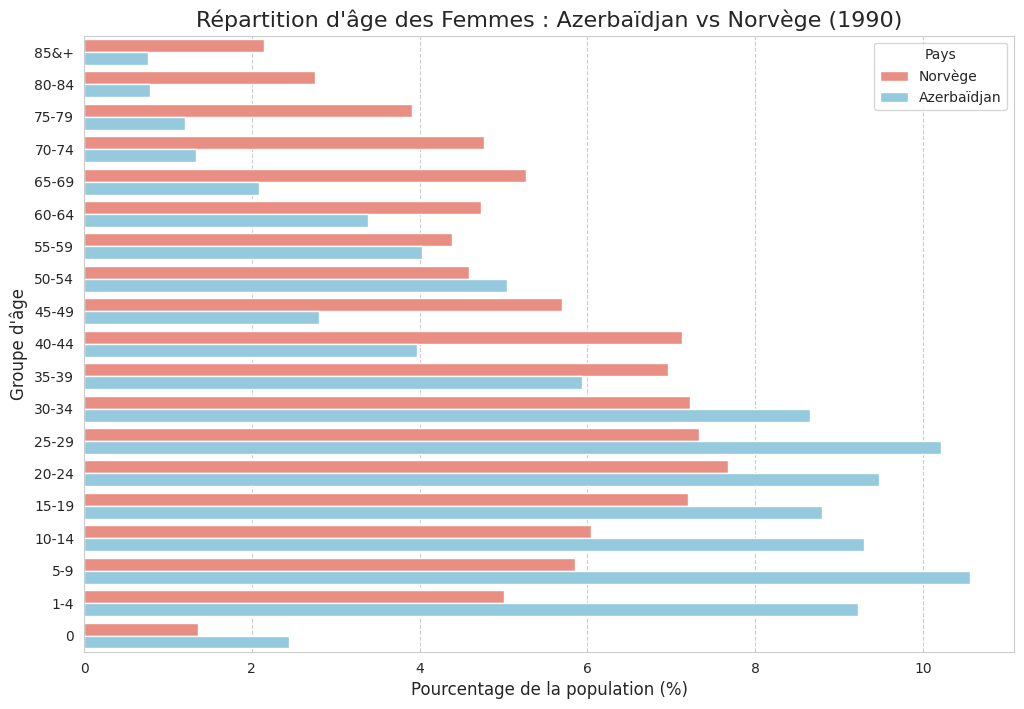


Figure enregistrée : figures/repartition_age_femmes.png




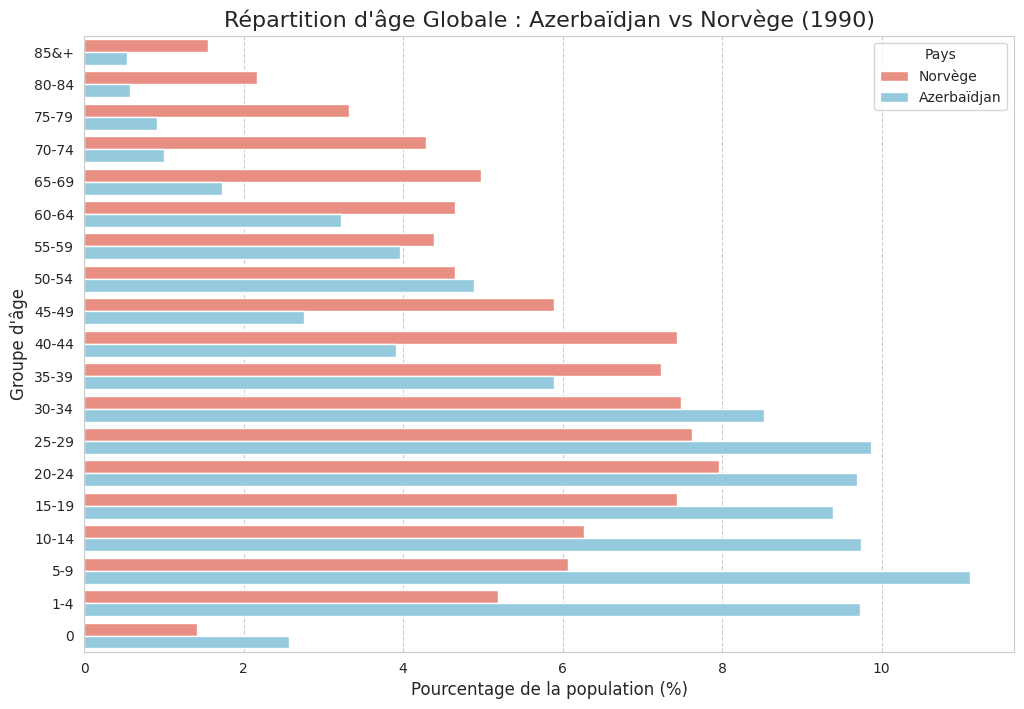


Figure enregistrée : figures/repartition_age_global.png




In [17]:
# Question 2 — Graphiques répartition d’âge

# 1. Calculer les proportions de population par groupe d'âge
# Hommes
df['Prop_AZE_Hommes'] = df['Pop_AZE_Hommes'] / df['Pop_AZE_Hommes'].sum()
df['Prop_NOR_Hommes'] = df['Pop_NOR_Hommes'] / df['Pop_NOR_Hommes'].sum()
# Femmes
df['Prop_AZE_Femmes'] = df['Pop_AZE_Femmes'] / df['Pop_AZE_Femmes'].sum()
df['Prop_NOR_Femmes'] = df['Pop_NOR_Femmes'] / df['Pop_NOR_Femmes'].sum()
# Global (Hommes + Femmes)
df['Pop_AZE_Global'] = df['Pop_AZE_Hommes'] + df['Pop_AZE_Femmes']
df['Pop_NOR_Global'] = df['Pop_NOR_Hommes'] + df['Pop_NOR_Femmes']
df['Prop_AZE_Global'] = df['Pop_AZE_Global'] / df['Pop_AZE_Global'].sum()
df['Prop_NOR_Global'] = df['Pop_NOR_Global'] / df['Pop_NOR_Global'].sum()

# Créer une colonne numérique pour l'ordre des groupes d'âge pour le graphique
# On utilise l'index du DataFrame pour l'ordre
df['Age_Order'] = df.index

# Fonction pour générer et sauvegarder le graphique
def generate_age_distribution_plot(df, prop_col_aze, prop_col_nor, title, filename):
    """Génère un graphique à barres comparatif de la répartition d'âge."""

    # Créer un DataFrame pour le graphique (format long)
    df_plot = pd.DataFrame({
        'Groupe_d_age': df['Groupe_d_age'],
        'Azerbaïdjan': df[prop_col_aze] * 100, # Convertir en pourcentage
        'Norvège': df[prop_col_nor] * 100,
        'Age_Order': df['Age_Order']
    }).melt(id_vars=['Groupe_d_age', 'Age_Order'], var_name='Pays', value_name='Pourcentage')

    # Ordonner les groupes d'âge
    df_plot = df_plot.sort_values(by='Age_Order', ascending=False)

    plt.figure(figsize=(12, 8))

    # Utiliser seaborn pour un barplot
    sns.barplot(
        x='Pourcentage',
        y='Groupe_d_age',
        hue='Pays',
        data=df_plot,
        palette={'Azerbaïdjan': 'skyblue', 'Norvège': 'salmon'}
    )

    plt.title(title, fontsize=16)
    plt.xlabel('Pourcentage de la population (%)', fontsize=12)
    plt.ylabel('Groupe d\'âge', fontsize=12)
    plt.legend(title='Pays')
    plt.grid(axis='x', linestyle='--')

    # Sauvegarder en haute résolution
    plt.savefig(f'figures/{filename}', dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\nFigure enregistrée : figures/{filename}")
    print("\n")

# Créer le dossier figures/
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

# Graphique 1 : Hommes Norvège vs Hommes Azerbaïdjan
generate_age_distribution_plot(
    df,
    'Prop_AZE_Hommes',
    'Prop_NOR_Hommes',
    "Répartition d'âge des Hommes : Azerbaïdjan vs Norvège (1990)",
    "repartition_age_hommes.png")

# Graphique 2 : Femmes Norvège vs Femmes Azerbaïdjan
generate_age_distribution_plot(
    df,
    'Prop_AZE_Femmes',
    'Prop_NOR_Femmes',
    "Répartition d'âge des Femmes : Azerbaïdjan vs Norvège (1990)",
    "repartition_age_femmes.png")

# Graphique 3 : Global Norvège vs Global Azerbaïdjan
generate_age_distribution_plot(
    df,
    'Prop_AZE_Global',
    'Prop_NOR_Global',
    "Répartition d'âge Globale : Azerbaïdjan vs Norvège (1990)",
    "repartition_age_global.png")

In [18]:
# Question 3 — Création des colonnes de population de référence

# Création des colonnes de référence
# Hommes
df['Deces_Ref_Hommes'] = df['Deces_AZE_Hommes'] + df['Deces_NOR_Hommes']
df['Pop_Ref_Hommes'] = df['Pop_AZE_Hommes'] + df['Pop_NOR_Hommes']

# Femmes
df['Deces_Ref_Femmes'] = df['Deces_AZE_Femmes'] + df['Deces_NOR_Femmes']
df['Pop_Ref_Femmes'] = df['Pop_AZE_Femmes'] + df['Pop_NOR_Femmes']

# Global (Hommes + Femmes)
df['Deces_Ref_Global'] = df['Deces_Ref_Hommes'] + df['Deces_Ref_Femmes']
df['Pop_Ref_Global'] = df['Pop_Ref_Hommes'] + df['Pop_Ref_Femmes']

# Afficher un extrait du DataFrame avec les nouvelles colonnes
print("### Extrait du DataFrame avec les colonnes de référence (somme des 2 pays)")
cols_to_show = ['Groupe_d_age', 'Deces_Ref_Hommes', 'Pop_Ref_Hommes', 'Deces_Ref_Femmes', 'Pop_Ref_Femmes', 'Deces_Ref_Global', 'Pop_Ref_Global']
print(df[cols_to_show].head().to_markdown(index=False))



### Extrait du DataFrame avec les colonnes de référence (somme des 2 pays)
| Groupe_d_age   |   Deces_Ref_Hommes |   Pop_Ref_Hommes |   Deces_Ref_Femmes |   Pop_Ref_Femmes |   Deces_Ref_Global |   Pop_Ref_Global |
|:---------------|-------------------:|-----------------:|-------------------:|-----------------:|-------------------:|-----------------:|
| 0              |               2627 |           123800 |               1994 |           116900 |               4621 |           240700 |
| 1-4            |               1792 |           464500 |               1504 |           438900 |               3296 |           903400 |
| 5-9            |                254 |           532300 |                192 |           504800 |                446 |          1037100 |
| 10-14          |                187 |           486200 |                117 |           463700 |                304 |           949900 |
| 15-19          |                420 |           503700 |                176 |           4

In [19]:
# Question 4 — Standardisation directe (référence = somme des 2 pays)

# 1. Calcul des Taux de Mortalité Spécifiques par Âge (ASMR)
# Azerbaïdjan
df['ASMR_AZE_Hommes'] = np.divide(df['Deces_AZE_Hommes'], df['Pop_AZE_Hommes'], out=np.zeros_like(df['Deces_AZE_Hommes'], dtype=float), where=df['Pop_AZE_Hommes']!=0)
df['ASMR_AZE_Femmes'] = np.divide(df['Deces_AZE_Femmes'], df['Pop_AZE_Femmes'], out=np.zeros_like(df['Deces_AZE_Femmes'], dtype=float), where=df['Pop_AZE_Femmes']!=0)
# Norvège
df['ASMR_NOR_Hommes'] = np.divide(df['Deces_NOR_Hommes'], df['Pop_NOR_Hommes'], out=np.zeros_like(df['Deces_NOR_Hommes'], dtype=float), where=df['Pop_NOR_Hommes']!=0)
df['ASMR_NOR_Femmes'] = np.divide(df['Deces_NOR_Femmes'], df['Pop_NOR_Femmes'], out=np.zeros_like(df['Deces_NOR_Femmes'], dtype=float), where=df['Pop_NOR_Femmes']!=0)

# 2. Calcul des Décès Attendus (ED) - 6 nouvelles colonnes
# La population de référence est Pop_Ref_Hommes, Pop_Ref_Femmes, Pop_Ref_Global

# Azerbaïdjan Hommes
df['ED_AZE_Hommes'] = df['ASMR_AZE_Hommes'] * df['Pop_Ref_Hommes']
# Azerbaïdjan Femmes
df['ED_AZE_Femmes'] = df['ASMR_AZE_Femmes'] * df['Pop_Ref_Femmes']
# Azerbaïdjan Global (on utilise les ASMR globaux pour le calcul global)
df['ASMR_AZE_Global'] = np.divide(df['Deces_AZE_Hommes'] + df['Deces_AZE_Femmes'], df['Pop_AZE_Hommes'] + df['Pop_AZE_Femmes'], out=np.zeros_like(df['Deces_AZE_Hommes'], dtype=float), where=(df['Pop_AZE_Hommes'] + df['Pop_AZE_Femmes'])!=0)
df['ED_AZE_Global'] = df['ASMR_AZE_Global'] * df['Pop_Ref_Global']

# Norvège Hommes
df['ED_NOR_Hommes'] = df['ASMR_NOR_Hommes'] * df['Pop_Ref_Hommes']
# Norvège Femmes
df['ED_NOR_Femmes'] = df['ASMR_NOR_Femmes'] * df['Pop_Ref_Femmes']
# Norvège Global
df['ASMR_NOR_Global'] = np.divide(df['Deces_NOR_Hommes'] + df['Deces_NOR_Femmes'], df['Pop_NOR_Hommes'] + df['Pop_NOR_Femmes'], out=np.zeros_like(df['Deces_NOR_Hommes'], dtype=float), where=(df['Pop_NOR_Hommes'] + df['Pop_NOR_Femmes'])!=0)
df['ED_NOR_Global'] = df['ASMR_NOR_Global'] * df['Pop_Ref_Global']

# Afficher un extrait du DataFrame avec les Décès Attendus
print("### Extrait du DataFrame avec les Décès Attendus (ED)")
cols_ed = ['Groupe_d_age', 'ED_AZE_Hommes', 'ED_AZE_Femmes', 'ED_AZE_Global', 'ED_NOR_Hommes', 'ED_NOR_Femmes', 'ED_NOR_Global']
print(df[cols_ed].head().round(2).to_markdown(index=False))

# 3. Calcul des Taux de Mortalité Standardisés (TMS)
total_pop_ref_h = df['Pop_Ref_Hommes'].sum()
total_pop_ref_f = df['Pop_Ref_Femmes'].sum()
total_pop_ref_g = df['Pop_Ref_Global'].sum()

# Somme des Décès Attendus
sum_ed_aze_h = df['ED_AZE_Hommes'].sum()
sum_ed_aze_f = df['ED_AZE_Femmes'].sum()
sum_ed_aze_g = df['ED_AZE_Global'].sum()

sum_ed_nor_h = df['ED_NOR_Hommes'].sum()
sum_ed_nor_f = df['ED_NOR_Femmes'].sum()
sum_ed_nor_g = df['ED_NOR_Global'].sum()

# Calcul des TMS (pour 100 000 habitants)
tms_aze_h = (sum_ed_aze_h / total_pop_ref_h) * 100000
tms_aze_f = (sum_ed_aze_f / total_pop_ref_f) * 100000
tms_aze_g = (sum_ed_aze_g / total_pop_ref_g) * 100000

tms_nor_h = (sum_ed_nor_h / total_pop_ref_h) * 100000
tms_nor_f = (sum_ed_nor_f / total_pop_ref_f) * 100000
tms_nor_g = (sum_ed_nor_g / total_pop_ref_g) * 100000

# Créer le tableau récapitulatif des TMS
data_tms = {
    'Pays': ['Azerbaïdjan', 'Azerbaïdjan', 'Azerbaïdjan', 'Norvège', 'Norvège', 'Norvège'],
    'Sexe': ['Hommes', 'Femmes', 'Global', 'Hommes', 'Femmes', 'Global'],
    'Somme Décès Attendus': [sum_ed_aze_h, sum_ed_aze_f, sum_ed_aze_g, sum_ed_nor_h, sum_ed_nor_f, sum_ed_nor_g],
    'Population de Référence Totale': [total_pop_ref_h, total_pop_ref_f, total_pop_ref_g, total_pop_ref_h, total_pop_ref_f, total_pop_ref_g],
    'Taux de Mortalité Standardisé (TMS) pour 100k hab.': [tms_aze_h, tms_aze_f, tms_aze_g, tms_nor_h, tms_nor_f, tms_nor_g]
}
df_tms = pd.DataFrame(data_tms)

# Afficher le tableau récapitulatif propre (arrondi à 2 décimales)
print("\n### Tableau récapitulatif des Taux de Mortalité Standardisés (TMS)")
print(df_tms.round(2).to_markdown(index=False))

# Sauvegarder le DataFrame mis à jour
df.to_csv('data_clean_q4.csv', index=False)

### Extrait du DataFrame avec les Décès Attendus (ED)
| Groupe_d_age   |   ED_AZE_Hommes |   ED_AZE_Femmes |   ED_AZE_Global |   ED_NOR_Hommes |   ED_NOR_Femmes |   ED_NOR_Global |
|:---------------|----------------:|----------------:|----------------:|----------------:|----------------:|----------------:|
| 0              |         3150.18 |         2431.31 |         5582.16 |         1040.4  |          680.58 |         1719.86 |
| 1-4            |         2298.72 |         1946.25 |         4245.23 |          213.94 |          138.94 |          352.67 |
| 5-9            |          296.53 |          226.25 |          522.81 |          125.01 |           88.49 |          213.46 |
| 10-14          |          205.53 |          127.69 |          333.2  |          139.32 |           89.45 |          228.81 |
| 15-19          |          411.54 |          188.97 |          601.76 |          438    |          149.41 |          583.96 |

### Tableau récapitulatif des Taux de Mortalité Standard

In [20]:
# Question 6 — Standardisation indirecte

# 1. Calcul des ASMR de la population de référence (AZE + NOR)
# Les colonnes Pop_Ref_Hommes/Femmes/Global et Deces_Ref_Hommes/Femmes/Global ont été créées en Q3.
# On utilise np.divide pour gérer les divisions par zéro.

# Hommes de référence
df['ASMR_Ref_Hommes'] = np.divide(df['Deces_Ref_Hommes'], df['Pop_Ref_Hommes'], out=np.zeros_like(df['Deces_Ref_Hommes'], dtype=float), where=df['Pop_Ref_Hommes']!=0)
# Femmes de référence
df['ASMR_Ref_Femmes'] = np.divide(df['Deces_Ref_Femmes'], df['Pop_Ref_Femmes'], out=np.zeros_like(df['Deces_Ref_Femmes'], dtype=float), where=df['Pop_Ref_Femmes']!=0)
# Global de référence
df['ASMR_Ref_Global'] = np.divide(df['Deces_Ref_Global'], df['Pop_Ref_Global'], out=np.zeros_like(df['Deces_Ref_Global'], dtype=float), where=df['Pop_Ref_Global']!=0)

# 2. Calcul des Décès Attendus (ED_Indirect) - 6 nouvelles colonnes
# ED_pays = ASMR_Ref * Pop_pays

# Azerbaïdjan
df['ED_Indirect_AZE_Hommes'] = df['ASMR_Ref_Hommes'] * df['Pop_AZE_Hommes']
df['ED_Indirect_AZE_Femmes'] = df['ASMR_Ref_Femmes'] * df['Pop_AZE_Femmes']
df['ED_Indirect_AZE_Global'] = df['ASMR_Ref_Global'] * df['Pop_AZE_Global'] # Pop_AZE_Global a été créé en Q2

# Norvège
df['ED_Indirect_NOR_Hommes'] = df['ASMR_Ref_Hommes'] * df['Pop_NOR_Hommes']
df['ED_Indirect_NOR_Femmes'] = df['ASMR_Ref_Femmes'] * df['Pop_NOR_Femmes']
df['ED_Indirect_NOR_Global'] = df['ASMR_Ref_Global'] * df['Pop_NOR_Global'] # Pop_NOR_Global a été créé en Q2

# Afficher un extrait du DataFrame avec les Décès Attendus (Indirect)
print("### Extrait du DataFrame avec les Décès Attendus (Standardisation Indirecte)")
cols_ed_ind = ['Groupe_d_age', 'ED_Indirect_AZE_Hommes', 'ED_Indirect_AZE_Femmes', 'ED_Indirect_AZE_Global', 'ED_Indirect_NOR_Hommes', 'ED_Indirect_NOR_Femmes', 'ED_Indirect_NOR_Global']
print(df[cols_ed_ind].head().round(2).to_markdown(index=False))

# 3. Calcul du Ratio Standardisé de Mortalité (SMR)
# Décès Observés Totaux (déjà calculés en Q1)
deces_obs_aze_h = df['Deces_AZE_Hommes'].sum()
deces_obs_aze_f = df['Deces_AZE_Femmes'].sum()
deces_obs_aze_g = deces_obs_aze_h + deces_obs_aze_f

deces_obs_nor_h = df['Deces_NOR_Hommes'].sum()
deces_obs_nor_f = df['Deces_NOR_Femmes'].sum()
deces_obs_nor_g = deces_obs_nor_h + deces_obs_nor_f

# Décès Attendus Totaux (somme des colonnes ED_Indirect)
sum_ed_ind_aze_h = df['ED_Indirect_AZE_Hommes'].sum()
sum_ed_ind_aze_f = df['ED_Indirect_AZE_Femmes'].sum()
sum_ed_ind_aze_g = df['ED_Indirect_AZE_Global'].sum()

sum_ed_ind_nor_h = df['ED_Indirect_NOR_Hommes'].sum()
sum_ed_ind_nor_f = df['ED_Indirect_NOR_Femmes'].sum()
sum_ed_ind_nor_g = df['ED_Indirect_NOR_Global'].sum()

# Calcul des SMR (multiplié par 100)
smr_aze_h = (deces_obs_aze_h / sum_ed_ind_aze_h) * 100
smr_aze_f = (deces_obs_aze_f / sum_ed_ind_aze_f) * 100
smr_aze_g = (deces_obs_aze_g / sum_ed_ind_aze_g) * 100

smr_nor_h = (deces_obs_nor_h / sum_ed_ind_nor_h) * 100
smr_nor_f = (deces_obs_nor_f / sum_ed_ind_nor_f) * 100
smr_nor_g = (deces_obs_nor_g / sum_ed_ind_nor_g) * 100

# Créer le tableau récapitulatif des SMR
data_smr = {
    'Pays': ['Azerbaïdjan', 'Azerbaïdjan', 'Azerbaïdjan', 'Norvège', 'Norvège', 'Norvège'],
    'Sexe': ['Hommes', 'Femmes', 'Global', 'Hommes', 'Femmes', 'Global'],
    'Décès Observés': [deces_obs_aze_h, deces_obs_aze_f, deces_obs_aze_g, deces_obs_nor_h, deces_obs_nor_f, deces_obs_nor_g],
    'Décès Attendus (Ref AZE+NOR)': [sum_ed_ind_aze_h, sum_ed_ind_aze_f, sum_ed_ind_aze_g, sum_ed_ind_nor_h, sum_ed_ind_nor_f, sum_ed_ind_nor_g],
    'Ratio Standardisé de Mortalité (SMR) (Ref AZE+NOR)': [smr_aze_h, smr_aze_f, smr_aze_g, smr_nor_h, smr_nor_f, smr_nor_g]
}
df_smr = pd.DataFrame(data_smr)

# Afficher le tableau récapitulatif propre (arrondi à 2 décimales)
print("\n### Tableau récapitulatif des Ratios Standardisés de Mortalité (SMR)")
print(df_smr.round(2).to_markdown(index=False))

# Sauvegarder le DataFrame mis à jour
df.to_csv('data_clean_q6.csv', index=False)

### Extrait du DataFrame avec les Décès Attendus (Standardisation Indirecte)
| Groupe_d_age   |   ED_Indirect_AZE_Hommes |   ED_Indirect_AZE_Femmes |   ED_Indirect_AZE_Global |   ED_Indirect_NOR_Hommes |   ED_Indirect_NOR_Femmes |   ED_Indirect_NOR_Global |
|:---------------|-------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------:|-------------------------:|
| 0              |                  1975.55 |                  1495.93 |                  3471.03 |                   651.45 |                   498.07 |                  1149.97 |
| 1-4            |                  1356.44 |                  1135.97 |                  2492.25 |                   435.56 |                   368.03 |                   803.75 |
| 5-9            |                   191.01 |                   144.27 |                   335.26 |                    62.99 |                    47.73 |                   110.74 |
| 10-14          |

In [21]:
# Question 7 — Standardisation directe vs populations européennes & mondiale

# 1. Calcul des Décès Attendus (ED) - 4 nouvelles colonnes
# ED_pays_ref = ASMR_pays_Global * Pop_Ref

# Azerbaïdjan
df['ED_AZE_Monde'] = df['ASMR_AZE_Global'] * df['Pop_Ref_Monde']
df['ED_AZE_Europe'] = df['ASMR_AZE_Global'] * df['Pop_Ref_Europe']

# Norvège
df['ED_NOR_Monde'] = df['ASMR_NOR_Global'] * df['Pop_Ref_Monde']
df['ED_NOR_Europe'] = df['ASMR_NOR_Global'] * df['Pop_Ref_Europe']

# Afficher un extrait du DataFrame avec les Décès Attendus
print("### Extrait du DataFrame avec les Décès Attendus (Références Monde et Europe)")
cols_ed_ref = ['Groupe_d_age', 'ED_AZE_Monde', 'ED_AZE_Europe', 'ED_NOR_Monde', 'ED_NOR_Europe']
print(df[cols_ed_ref].head().round(2).to_markdown(index=False))

# 2. Calcul des Taux de Mortalité Standardisés (TMS)
total_pop_ref_monde = df['Pop_Ref_Monde'].sum()
total_pop_ref_europe = df['Pop_Ref_Europe'].sum()

# Somme des Décès Attendus
sum_ed_aze_monde = df['ED_AZE_Monde'].sum()
sum_ed_aze_europe = df['ED_AZE_Europe'].sum()

sum_ed_nor_monde = df['ED_NOR_Monde'].sum()
sum_ed_nor_europe = df['ED_NOR_Europe'].sum()

# Calcul des TMS (pour 100 000 habitants)
tms_aze_monde = (sum_ed_aze_monde / total_pop_ref_monde) * 100000
tms_aze_europe = (sum_ed_aze_europe / total_pop_ref_europe) * 100000

tms_nor_monde = (sum_ed_nor_monde / total_pop_ref_monde) * 100000
tms_nor_europe = (sum_ed_nor_europe / total_pop_ref_europe) * 100000

# Créer le tableau récapitulatif des TMS
data_tms_ref = {
    'Pays': ['Azerbaïdjan', 'Norvège'],
    'TMS (Ref Monde)': [tms_aze_monde, tms_nor_monde],
    'TMS (Ref Europe)': [tms_aze_europe, tms_nor_europe]
}
df_tms_ref = pd.DataFrame(data_tms_ref)

# Afficher le tableau récapitulatif propre (arrondi à 2 décimales)
print("\n### Tableau récapitulatif des Taux de Mortalité Standardisés (TMS) - Références Monde et Europe")
print(df_tms_ref.round(2).to_markdown(index=False))

# Sauvegarder le DataFrame mis à jour
df.to_csv('data_clean_q7.csv', index=False)

### Extrait du DataFrame avec les Décès Attendus (Références Monde et Europe)
| Groupe_d_age   |   ED_AZE_Monde |   ED_AZE_Europe |   ED_NOR_Monde |   ED_NOR_Europe |
|:---------------|---------------:|----------------:|---------------:|----------------:|
| 0              |          55.66 |           37.11 |          17.15 |           11.43 |
| 1-4            |          45.11 |           30.07 |           3.75 |            2.5  |
| 5-9            |           5.04 |            3.53 |           2.06 |            1.44 |
| 10-14          |           3.16 |            2.46 |           2.17 |            1.69 |
| 15-19          |           5.56 |            4.32 |           5.39 |            4.2  |

### Tableau récapitulatif des Taux de Mortalité Standardisés (TMS) - Références Monde et Europe
| Pays        |   TMS (Ref Monde) |   TMS (Ref Europe) |
|:------------|------------------:|-------------------:|
| Azerbaïdjan |            705.47 |             974.49 |
| Norvège     |            498.

In [22]:
# Création du tableau final synthétique (CSV)
print("\n### Création du Tableau de Synthèse (CSV)")

# Récupérer les données des tableaux précédents
# TBM (Question 1)
df_tbm_global = df_tbm[df_tbm['Sexe'] != 'Global'].copy()
df_tbm_global = df_tbm_global.pivot(index='Pays', columns='Sexe', values='Taux Brut de Mortalité (pour 100k hab.)').reset_index()
df_tbm_global.columns = ['Pays', 'TBM_Femmes', 'TBM_Hommes']
df_tbm_global['TBM_Global'] = df_tbm[df_tbm['Sexe'] == 'Global']['Taux Brut de Mortalité (pour 100k hab.)'].values

# TMS (Question 4 - Ref AZE+NOR)
df_tms_global = df_tms[df_tms['Sexe'] != 'Global'].copy()
df_tms_global = df_tms_global.pivot(index='Pays', columns='Sexe', values='Taux de Mortalité Standardisé (TMS) pour 100k hab.').reset_index()
df_tms_global.columns = ['Pays', 'TMS_RefAZE_NOR_Femmes', 'TMS_RefAZE_NOR_Hommes']
df_tms_global['TMS_RefAZE_NOR_Global'] = df_tms[df_tms['Sexe'] == 'Global']['Taux de Mortalité Standardisé (TMS) pour 100k hab.'].values

# SMR (Question 6 - Ref AZE+NOR)
df_smr_global = df_smr[df_smr['Sexe'] != 'Global'].copy()
df_smr_global = df_smr_global.pivot(index='Pays', columns='Sexe', values='Ratio Standardisé de Mortalité (SMR) (Ref AZE+NOR)').reset_index()
df_smr_global.columns = ['Pays', 'SMR_Femmes', 'SMR_Hommes']
df_smr_global['SMR_Global'] = df_smr[df_smr['Sexe'] == 'Global']['Ratio Standardisé de Mortalité (SMR) (Ref AZE+NOR)'].values

# TMS (Question 7 - Ref Monde/Europe)
df_tms_ref_final = df_tms_ref.copy()
df_tms_ref_final.columns = ['Pays', 'TMS_RefMonde_Global', 'TMS_RefEurope_Global']

# Fusionner tous les tableaux
df_synthese = df_tbm_global.merge(df_tms_global, on='Pays')
df_synthese = df_synthese.merge(df_smr_global, on='Pays')
df_synthese = df_synthese.merge(df_tms_ref_final, on='Pays')

# Mise en forme finale pour le CSV
# On va créer un DataFrame final plus simple pour le CSV
final_data = []
for pays in ['Azerbaïdjan', 'Norvège']:
    # Global
    final_data.append({
        'Pays': pays,
        'Sexe': 'Global',
        'Taux Brut (100k)': df_tbm[df_tbm['Pays'] == pays][df_tbm['Sexe'] == 'Global']['Taux Brut de Mortalité (pour 100k hab.)'].values[0],
        'TMS (Ref AZE+NOR, 100k)': df_tms[df_tms['Pays'] == pays][df_tms['Sexe'] == 'Global']['Taux de Mortalité Standardisé (TMS) pour 100k hab.'].values[0],
        'SMR (Ref AZE+NOR, %)': df_smr[df_smr['Pays'] == pays][df_smr['Sexe'] == 'Global']['Ratio Standardisé de Mortalité (SMR) (Ref AZE+NOR)'].values[0],
        'TMS (Ref Europe, 100k)': df_tms_ref[df_tms_ref['Pays'] == pays]['TMS (Ref Europe)'].values[0],
        'TMS (Ref Monde, 100k)': df_tms_ref[df_tms_ref['Pays'] == pays]['TMS (Ref Monde)'].values[0],
    })
    # Hommes
    final_data.append({
        'Pays': pays,
        'Sexe': 'Hommes',
        'Taux Brut (100k)': df_tbm[df_tbm['Pays'] == pays][df_tbm['Sexe'] == 'Hommes']['Taux Brut de Mortalité (pour 100k hab.)'].values[0],
        'TMS (Ref AZE+NOR, 100k)': df_tms[df_tms['Pays'] == pays][df_tms['Sexe'] == 'Hommes']['Taux de Mortalité Standardisé (TMS) pour 100k hab.'].values[0],
        'SMR (Ref AZE+NOR, %)': df_smr[df_smr['Pays'] == pays][df_smr['Sexe'] == 'Hommes']['Ratio Standardisé de Mortalité (SMR) (Ref AZE+NOR)'].values[0],
        'TMS (Ref Europe, 100k)': np.nan, # Non calculé pour le sexe
        'TMS (Ref Monde, 100k)': np.nan, # Non calculé pour le sexe
    })
    # Femmes
    final_data.append({
        'Pays': pays,
        'Sexe': 'Femmes',
        'Taux Brut (100k)': df_tbm[df_tbm['Pays'] == pays][df_tbm['Sexe'] == 'Femmes']['Taux Brut de Mortalité (pour 100k hab.)'].values[0],
        'TMS (Ref AZE+NOR, 100k)': df_tms[df_tms['Pays'] == pays][df_tms['Sexe'] == 'Femmes']['Taux de Mortalité Standardisé (TMS) pour 100k hab.'].values[0],
        'SMR (Ref AZE+NOR, %)': df_smr[df_smr['Pays'] == pays][df_smr['Sexe'] == 'Femmes']['Ratio Standardisé de Mortalité (SMR) (Ref AZE+NOR)'].values[0],
        'TMS (Ref Europe, 100k)': np.nan, # Non calculé pour le sexe
        'TMS (Ref Monde, 100k)': np.nan, # Non calculé pour le sexe
    })

df_synthese_csv = pd.DataFrame(final_data)

# Sauvegarder le CSV
csv_path = 'synthese.csv'
df_synthese_csv.round(2).to_csv(csv_path, index=False, sep=';')

# Sauvegarder le CSV
csv_path = 'synthese.csv'
df_synthese_csv.round(2).to_csv(csv_path, index=False, sep=';')

print(f"\nTableau de synthèse sauvegardé : {csv_path}")
print(df_synthese_csv.round(2).to_markdown(index=False))


### Création du Tableau de Synthèse (CSV)

Tableau de synthèse sauvegardé : synthese.csv
| Pays        | Sexe   |   Taux Brut (100k) |   TMS (Ref AZE+NOR, 100k) |   SMR (Ref AZE+NOR, %) |   TMS (Ref Europe, 100k) |   TMS (Ref Monde, 100k) |
|:------------|:-------|-------------------:|--------------------------:|-----------------------:|-------------------------:|------------------------:|
| Azerbaïdjan | Global |             609.8  |                    848.11 |                 110.64 |                   974.49 |                  705.47 |
| Azerbaïdjan | Hommes |             670.89 |                    945.62 |                 114.93 |                   nan    |                  nan    |
| Azerbaïdjan | Femmes |             551.53 |                    780.93 |                 109.16 |                   nan    |                  nan    |
| Norvège     | Global |            1085.49 |                    678.1  |                  91.79 |                   774.12 |                  498.74 

/tmp/ipython-input-1702478145.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Taux Brut (100k)': df_tbm[df_tbm['Pays'] == pays][df_tbm['Sexe'] == 'Global']['Taux Brut de Mortalité (pour 100k hab.)'].values[0],
/tmp/ipython-input-1702478145.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'TMS (Ref AZE+NOR, 100k)': df_tms[df_tms['Pays'] == pays][df_tms['Sexe'] == 'Global']['Taux de Mortalité Standardisé (TMS) pour 100k hab.'].values[0],
/tmp/ipython-input-1702478145.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'SMR (Ref AZE+NOR, %)': df_smr[df_smr['Pays'] == pays][df_smr['Sexe'] == 'Global']['Ratio Standardisé de Mortalité (SMR) (Ref AZE+NOR)'].values[0],
/tmp/ipython-input-1702478145.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Taux Brut (100k)': df_tbm[df_tbm['Pays'] == pays][df_tbm['Sexe'] == 'Hommes']['Taux Brut de Mortalité (pour